In [1]:
from parse import load_dataframes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

data = load_dataframes()

In [2]:
dong_stores = data['stores'].loc[data['stores']['dong'] == "종로1.2.3.4가동",['road_name']]
dong_stores = dong_stores.groupby(['road_name'])
ro = []
for item, i in dong_stores:
    ro.append(item.split()[2])
ro

['돈화문로',
 '돈화문로11가길',
 '돈화문로11길',
 '돈화문로11나길',
 '돈화문로11다길',
 '돈화문로5가길',
 '돈화문로5길',
 '돈화문로9가길',
 '돈화문로9길',
 '동순라길',
 '무교로',
 '삼봉로',
 '삼일대로',
 '삼일대로15길',
 '삼일대로17길',
 '삼일대로19길',
 '삼일대로20길',
 '삼일대로26길',
 '삼일대로30길',
 '삼일대로32길',
 '서순라길',
 '수표로',
 '수표로20길',
 '수표로22길',
 '수표로28길',
 '우정국로',
 '우정국로2길',
 '율곡로',
 '율곡로10길',
 '율곡로2길',
 '율곡로4길',
 '율곡로6길',
 '율곡로8길',
 '인사동16길',
 '인사동1길',
 '인사동3길',
 '인사동6길',
 '인사동7길',
 '인사동8길',
 '인사동9길',
 '인사동길',
 '종로',
 '종로10길',
 '종로11길',
 '종로12길',
 '종로14길',
 '종로16길',
 '종로17길',
 '종로18길',
 '종로1길',
 '종로26길',
 '종로31길',
 '종로3길',
 '종로5길',
 '종로7길',
 '종로8길',
 '종로9길',
 '창경궁로',
 '창경궁로18길',
 '청계천로']

In [3]:
#신사동에 있는 도로명주소의 유동인구들 합을 뽑아보자!
pop = data['population']
road_popul = pop.loc[(pop["road"].isin(ro))].groupby(["year"])
road_popul = road_popul.sum().reset_index()
road_popul

,year,quarter,total_pcnt,men_pcnt,women_pcnt,teen_pcnt,twenty_pcnt,thirty_pcnt,fourty_pcnt,fifty_pcnt,...,time4_pcnt,time5_pcnt,time6_pcnt,mon_pcnt,tue_pcnt,wed_pcnt,thr_pcnt,fri_pcnt,sat_pcnt,sun_pcnt
0,2019,4,3463445,1913457,1549990,91534,987936,704703,565692,550399,...,767655,938588,360476,456759,487663,509697,505013,543094,567107,394113


In [4]:
# 성별
gender = road_popul.loc[:,['men_pcnt','women_pcnt']]
gender_columns = ["남","여"]
index = 0
gender_values = []
for i in gender:
    str = gender_columns[index]
    index += 1
    str += " " + np.array2string(gender[i].values[0])
    str += "명"
    gender_values.append(str)

# 나이대
ages = road_popul.loc[:,['teen_pcnt','twenty_pcnt','thirty_pcnt','fourty_pcnt','fifty_pcnt','sixty_pcnt']]
ages_columns = ["10대","20대","30대","40대","50대","60대 이상",]
ages_values = []
index = 0
for i in ages:
    str = ages_columns[index]
    index += 1   
    str += " " + np.array2string(ages[i].values[0])
    str += "명"
    ages_values.append(str)

# 시간대
times = road_popul.loc[:,['time1_pcnt','time2_pcnt','time3_pcnt','time4_pcnt','time5_pcnt','time6_pcnt']]
times_columns = ["00시~06시", "06시~11시", "11시~14시", "14시~17시", "17시~21시", "21시~24시"]
times_values = []
index = 0
for i in times:
    str = times_columns[index]
    index += 1
    str += " " + np.array2string(times[i].values[0])
    str += "명"
    times_values.append(str)

# 요일별
days = road_popul.loc[:,['mon_pcnt','tue_pcnt','wed_pcnt','thr_pcnt','fri_pcnt','sat_pcnt','sun_pcnt']]
days_columns=["월","화","수","목","금","토","일"]
days_values = []
index = 0
for i in days:
    str = days_columns[index]
    index += 1
    str += " " + np.array2string(days[i].values[0])
    str += "명"
    days_values.append(str)

In [5]:
def set_config():
    # 폰트, 그래프 색상 설정
    font_list = fm.findSystemFonts(fontpaths=None, fontext="ttf")
    if any(["notosanscjk" in font.lower() for font in font_list]):
        plt.rcParams["font.family"] = "Noto Sans CJK JP"
    else:
        if not any(["malgun" in font.lower() for font in font_list]):
            raise Exception(
                "Font missing, please install Noto Sans CJK or Malgun Gothic. If you're using ubuntu, try `sudo apt install fonts-noto-cjk`"
            )

        plt.rcParams["font.family"] = "Malgun Gothic"

    sns.set_palette(sns.color_palette("Spectral"))
    plt.rc("xtick", labelsize=6)


set_config()

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


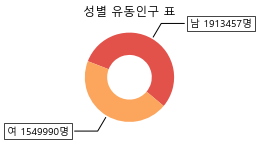

In [6]:
fig, ax = plt.subplots(figsize=(2, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(gender, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(gender_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("성별 유동인구 표")

plt.show()

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


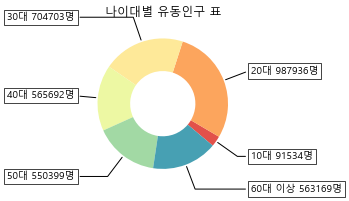

In [7]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(ages, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(ages_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("나이대별 유동인구 표")

plt.show()

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


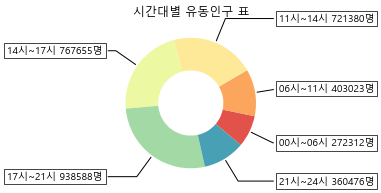

In [8]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(times, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(times_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("시간대별 유동인구 표")

plt.show()

c:\users\multicampus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


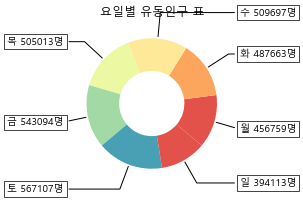

In [29]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(days, wedgeprops=dict(width=0.5), startangle=-40)
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(days_values[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("요일별 유동인구 표")

plt.show()

In [36]:
# 어떤 성별이 더 많은가
if (gender["men_pcnt"].values[0] > gender["women_pcnt"].values[0]):
    max_gender = gender["men_pcnt"].values[0]
    max_gender_id = 0
else:
    max_gender = gender["women_pcnt"].values[0]
    max_gender_id = 1


print(gender_columns[max_gender_id])
print(max_gender)

남
1913457


In [32]:
# 어떤 나이대가 가장 많은가
ages = road_popul.loc[:,['teen_pcnt','twenty_pcnt','thirty_pcnt','fourty_pcnt','fifty_pcnt','sixty_pcnt']]
ages_columns = ["10대","20대","30대","40대","50대","60대 이상",]
ages_values = []
index = 0
max_ages = ages['teen_pcnt'].values[0]
max_ages_id = 0
for i in ages:
    if max_ages < ages[i].values[0]:
        max_ages = ages[i].values[0]
        max_ages_id = index
    str = ages_columns[index]
    index += 1
    str += " " + np.array2string(ages[i].values[0])
    str += "명"
    ages_values.append(str)

print(ages_columns[max_ages_id])
print(max_ages)

20대
987936


In [57]:
# 그럼 가장 많은 나이대의 유저들만 뽑아서 어떤 카테고리에 리뷰를 가장 많이 남겼으며, 어떤 카테고리에 평점을 가장 좋게 줬는데 볼까?
if max_ages_id == 0:
    min_scope = 10
    max_scope = 19
elif max_ages_id == 1:
    min_scope = 20
    max_scope = 29
elif max_ages_id == 2:
    min_scope = 30
    max_scope = 39
elif max_ages_id == 3:
    min_scope = 40
    max_scope = 49
elif max_ages_id == 4:
    min_scope = 50
    max_scope = 59
elif max_ages_id == 5:
    min_scope = 60
    max_scope = 99

users = data['users']
users.rename(columns={'id':'user'},inplace=True)

stores = data['stores']
stores.rename(columns={'id':'store'}, inplace = True)
# 서울 음식점 중 리뷰가 있는 음식점만 
ratings_stores = pd.merge(data['reviews'], stores, on='store')
ratings_stores.columns
user_store_review_merge = pd.merge(users, ratings_stores, on='user')
user_store_review_merge = user_store_review_merge.loc[(user_store_review_merge["age"] >= min_scope) & (user_store_review_merge["age"] <= max_scope),:]
user_store_review_merge

,user,gender,age,id,store,score,content,reg_time,sanga_number,상호명,...,경도,위도,large_code,medium_code,small_code,road_name,store_name,address,latitude,longitude
3146,389728,여,28,12629,88141,3,연기 빠지는게 없어서 옷에 냄새가 많이 배고 탈취제도 따로 없어서 아쉬움. 직원분 ...,1970-01-01 00:00:00,15561688,대한곱창,...,127.066272,37.562976,Q,Q01,Q01A03,서울특별시 동대문구 천호대로85길,대한곱창,서울특별시 동대문구 장안동 433-20,37.562967,127.066256
3147,389728,여,28,7394,120441,4,생맥주 종류가 다양하게 구비되어있어서 좋았어요 낮에 맥주 한 잔 하기에 좋아요,2018-08-01 12:58:37,11924256,러스틱보이즈,...,126.926562,37.562121,Q,Q09,Q09A01,서울특별시 마포구 동교로46길,러스틱보이즈,서울특별시 마포구 연남동 227-9,37.562131,126.926580
3148,389728,여,28,14663,243874,2,너무 시끌벅적해서 메뉴 나왔다고 부르는 파트너 목소리도 잘 안 들림,1970-01-01 00:00:00,20093795,스타벅스,...,127.079029,37.510526,Q,Q12,Q12A01,서울특별시 송파구 백제고분로,스타벅스,서울특별시 송파구 잠실동 175,37.510529,127.079052
3149,389728,여,28,2185,359335,2,짜장면 맛이 좀 보통이랑 다르게 특이해요 조미료가 덜 들어간 맛이랄까요,1970-01-01 00:00:00,16238257,중원,...,127.056144,37.677525,Q,Q02,Q02A00,서울특별시 노원구 동일로242가길,중원,서울특별시 노원구 상계동 1115-18,37.677538,127.056171
3150,389728,여,28,12629,88141,3,연기 빠지는게 없어서 옷에 냄새가 많이 배고 탈취제도 따로 없어서 아쉬움. 직원분 ...,1970-01-01 00:00:00,15561688,대한곱창,...,127.066272,37.562976,Q,Q01,Q01A03,서울특별시 동대문구 천호대로85길,대한곱창,서울특별시 동대문구 장안동 433-20,37.562967,127.066256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675073,154897,남,27,805,352360,1,직원 사가지 없음 두명이 갔는데 한명은 속이 너무 아파서 죽먹는 사람이고 저만 밥먹...,1970-01-01 00:00:00,20029593,조마루감자탕,...,129.118293,35.168604,Q,Q01,Q01A05,부산광역시 수영구 수영로,조마루감자탕,부산광역시 수영구 수영동 444-8,35.168583,129.118300
675075,156985,남,21,892,352682,1,조선갈비 알바했는데 고용노동부에서 제공하는 표준근로계약서양식을 들고 가서 시급 90...,1970-01-01 00:00:00,11924285,조선갈비,...,126.845514,37.558086,Q,Q01,Q01A02,서울특별시 강서구 공항대로,조선갈비,서울특별시 강서구 등촌동 664-7,37.558127,126.845531
675077,543432,남,24,1188,353960,5,,1970-01-01 00:00:00,19987226,족발속으로,...,127.118086,37.532720,Q,Q01,Q01A02,서울특별시 송파구 올림픽로51길,족발속으로,서울특별시 송파구 풍납동 162-41,37.532600,127.118240
675078,14959,남,24,1229,354192,5,숨은 상봉 맛집,1970-01-01 00:00:00,26404143,족발집,...,127.087119,37.593801,Q,Q01,Q01A01,서울특별시 중랑구 봉우재로33길,족발집,서울특별시 중랑구 상봉동 107-60,37.593808,127.087154


In [114]:
# 가장 많은 나이대의 사람들이 가장 리뷰를 많이 남긴 순 음식점 카테고리
count_category = user_store_review_merge.groupby(["small_code"])
count_category = count_category.count().sort_values(by="small_code")
top_count_category = count_category.sort_values(by="id", ascending = False)[0:10]
top_count_category

,user,gender,age,id,store,score,content,reg_time,sanga_number,상호명,...,지번주소,경도,위도,large_code,medium_code,road_name,store_name,address,latitude,longitude
small_code,,,,,,,,,,,,,,,,,,,,,
Q01A01,46274,46274,46274,46274,46274,46274,46274,46274,46274,46274,...,46274,46274,46274,46274,46274,46274,46274,46274,46274,46274
Q06A01,16742,16742,16742,16742,16742,16742,16742,16742,16742,16742,...,16742,16742,16742,16742,16742,16742,16742,16742,16742,16742
Q12A01,14962,14962,14962,14962,14962,14962,14962,14962,14962,14962,...,14962,14962,14962,14962,14962,14962,14962,14962,14962,14962
Q03A02,12004,12004,12004,12004,12004,12004,12004,12004,12004,12004,...,12004,12004,12004,12004,12004,12004,12004,12004,12004,12004
Q04A01,8927,8927,8927,8927,8927,8927,8927,8927,8927,8927,...,8927,8927,8927,8927,8927,8927,8927,8927,8927,8927
Q09A01,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045,...,6045,6045,6045,6045,6045,6045,6045,6045,6045,6045
Q07A04,4789,4789,4789,4789,4789,4789,4789,4789,4789,4789,...,4789,4789,4789,4789,4789,4789,4789,4789,4789,4789
Q03A03,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634,...,4634,4634,4634,4634,4634,4634,4634,4634,4634,4634
Q04A02,3936,3936,3936,3936,3936,3936,3936,3936,3936,3936,...,3936,3936,3936,3936,3936,3936,3936,3936,3936,3936


In [115]:
# 가장 많은 나이대의 사람들이 평균이 높은 순 음식점 카테고리
avg_category = user_store_review_merge.groupby(["small_code"]).mean().sort_values(by="small_code")
avg_category["count"] = count_category["score"]
avg_category = avg_category.loc[avg_category["count"] > 200, :][["score", "count"]]
top_avg_category = avg_category.sort_values(by="score", ascending=False)[0:10]
top_avg_category

,score,count
small_code,,
Q05A03,4.936275,204
Q01A07,4.527054,499
Q07A03,4.311189,286
Q10A08,4.292127,1448
Q05A02,4.239085,481
Q10A01,4.235931,462
Q01A02,4.119712,3333
Q08A01,4.097269,3259
Q09A07,4.078358,804
